# Task 2.2
## Gaussian Mixture Models

### Exploración y preprocesamiento del dataset

**Importar Librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Limpiar los warnings
warnings.filterwarnings('ignore')

**Cargar el dataset al entorno**

In [2]:
df = pd.read_csv("bank_transactions.csv", sep=",")
df = df.sample(n = 1000, random_state = 42)

**Visualizar estructura e información general del dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 892845 to 341759
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            1000 non-null   object 
 1   CustomerID               1000 non-null   object 
 2   CustomerDOB              995 non-null    object 
 3   CustGender               1000 non-null   object 
 4   CustLocation             1000 non-null   object 
 5   CustAccountBalance       994 non-null    float64
 6   TransactionDate          1000 non-null   object 
 7   TransactionTime          1000 non-null   int64  
 8   TransactionAmount (INR)  1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 78.1+ KB


In [4]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
892845,T892846,C5725279,8/9/84,M,JASPUR,84447.82,7/9/16,183210,11858.0
444994,T444995,C4588538,2/1/94,M,GURGAON,12549.49,16/8/16,161300,250.0
614896,T614897,C2416476,14/11/90,M,NEW DELHI,33607.65,26/8/16,102007,3360.0
457036,T457037,C5940151,15/9/90,M,HYDERABAD,38238.86,21/8/16,110438,250.0
997441,T997442,C5922989,27/11/88,M,PURBO MEDINIPUR,9506.85,14/9/16,90810,33.0


**Verificar existencia de valores nulos**

In [5]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                5
CustGender                 0
CustLocation               0
CustAccountBalance         6
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

**Calcular impacto de nulos en el dataset**

In [6]:
# Calcular el porcentaje de valores nulos en todo el DataFrame
porcentaje_total_nulos = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

# Imprimir el porcentaje total de valores nulos
print(f"Porcentaje total de valores nulos en el DataFrame: {porcentaje_total_nulos:.2f}%")

Porcentaje total de valores nulos en el DataFrame: 0.12%


Dado que la cantidad de samples con valores nulos equivale a menos del 1% del dataset, eliminarlos no tendrá impacto perceptible en el análisis.

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

**Procesamiento de atributos relacionados con el tiempo y/o la fecha**

In [8]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionTime'] = df['TransactionTime'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))

**Estadísticas descriptivas**

In [9]:
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionAmount (INR)
count,989,9.890000e+02,989,989.000000
mean,1982-11-26 18:51:19.474216384,9.959890e+04,2016-07-21 19:55:23.356926208,1759.400030
min,1800-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000
25%,1983-04-10 00:00:00,4.769450e+03,2016-06-09 00:00:00,170.000000
50%,1988-07-24 00:00:00,1.588730e+04,2016-08-18 00:00:00,462.000000
75%,1992-07-04 00:00:00,5.431194e+04,2016-09-08 00:00:00,1283.540000
max,2073-03-26 00:00:00,6.406304e+06,2016-12-09 00:00:00,107000.040000
std,NaN,3.951356e+05,NaN,5882.753928


**Conteo de valores únicos en características categorías**

Para característica de 'Género'

In [10]:
df['CustGender'].value_counts()

CustGender
M    727
F    262
Name: count, dtype: int64

Se identifica un único registro con el valor 'T' en la variable de género, por lo tanto, se procede a su eliminación

In [11]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

Para característica de 'Ubicación'

In [12]:
df['CustLocation'].value_counts()

CustLocation
MUMBAI       92
BANGALORE    89
NEW DELHI    82
GURGAON      70
DELHI        59
             ..
MAHAD         1
BHANDARA      1
SIRMAUR       1
VAPI          1
BATHINDA      1
Name: count, Length: 273, dtype: int64

*Requiere de codificación

In [13]:
df['CustomerDOB'].value_counts()

CustomerDOB
1800-01-01    57
1991-10-06     3
1985-01-05     3
1988-01-01     2
1985-03-30     2
              ..
1994-02-27     1
1976-03-21     1
2053-01-07     1
1985-03-27     1
1992-11-11     1
Name: count, Length: 876, dtype: int64

In [14]:
# Calcular el número de registros a eliminar
registros_a_eliminar = len(df[df['CustomerDOB'].dt.year == 1800])

# Calcular el porcentaje de registros eliminados
porcentaje_registros_eliminados = (registros_a_eliminar / len(df)) * 100

# Imprimir el porcentaje
print(f"Porcentaje de registros a eliminar: {porcentaje_registros_eliminados:.2f}%")

Porcentaje de registros a eliminar: 5.76%


Se detecta la existencia de múltiples fechas de nacimiento registradas en el año 1800, lo cual resulta inconsistente con el resto de datos. Dado que estas instancias representan solo el 5% del total de datos, se opta por su eliminación del conjunto de datos.

In [15]:
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index, axis=0)

**Corregir fechas de nacimiento mayores al año actual**

In [16]:
df.loc[df.CustomerDOB.dt.year >= 2024, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2024, 'CustomerDOB'] - pd.DateOffset(years=100)

Se aplica un offset de 100 años a las fechas de nacimiento mayores al año actual

**Convertir fecha de nacimiento a edad**

In [17]:
df['CustomerAge'] = ((pd.to_datetime('today') - df['CustomerDOB']).dt.days / 365.25).round(0)

**Ver el dataset actualizado**

In [18]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,M,JASPUR,84447.82,2016-07-09,02:53:30,11858.00,40.0
444994,T444995,C4588538,1994-02-01,M,GURGAON,12549.49,2016-08-16,20:48:20,250.00,30.0
614896,T614897,C2416476,1990-11-14,M,NEW DELHI,33607.65,2016-08-26,04:20:07,3360.00,33.0
457036,T457037,C5940151,1990-09-15,M,HYDERABAD,38238.86,2016-08-21,06:40:38,250.00,33.0
997441,T997442,C5922989,1988-11-27,M,PURBO MEDINIPUR,9506.85,2016-09-14,01:13:30,33.00,35.0
...,...,...,...,...,...,...,...,...,...,...
372797,T372798,C1532982,1988-08-13,F,HYDERABAD,12340.96,2016-08-14,16:39:08,422.82,36.0
687135,T687136,C4420786,1987-04-27,M,GURGAON,44152.85,2016-08-31,11:30:35,420.00,37.0
641030,T641031,C6142473,1975-01-11,M,KOLKATA,10026.44,2016-08-25,06:07:14,499.00,49.0
408194,T408195,C5631770,1988-05-12,F,AHMEDABAD,21335.25,2016-08-18,16:24:19,68.00,36.0


**Gráficas de distribución**

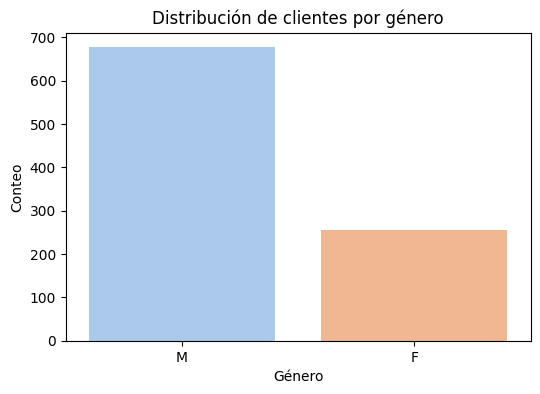

In [19]:
# 1. Distribución de clientes por género
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender', data = df, palette='pastel')
plt.title('Distribución de clientes por género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.show()

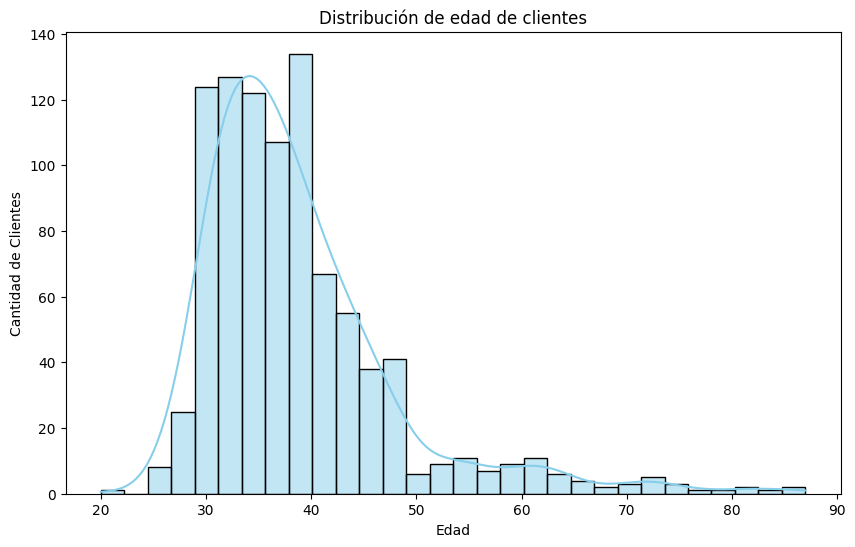

In [20]:
# 2. Distribución de edad de clientes
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de edad de clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.show()

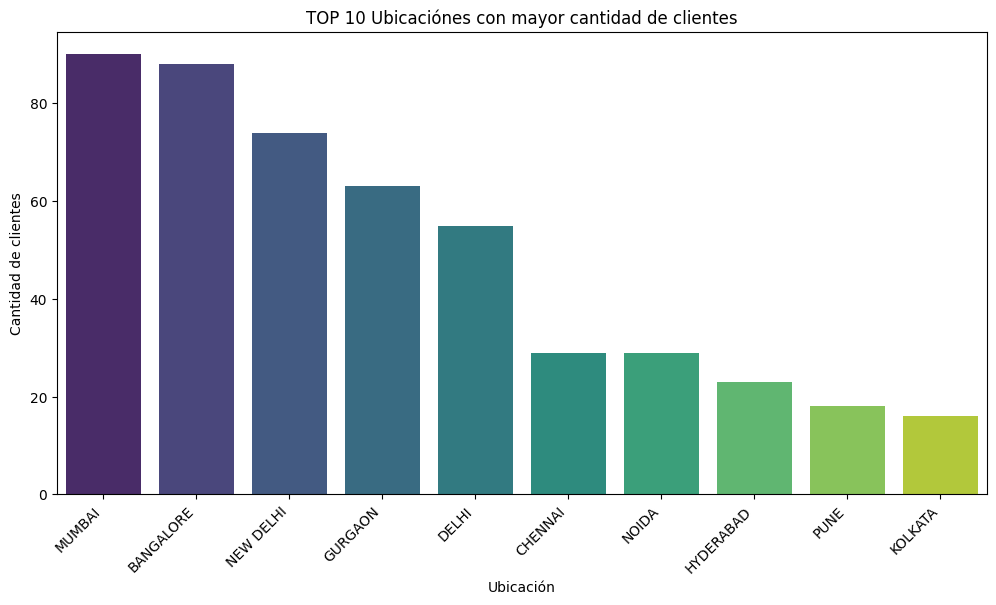

In [21]:
# 3. TOP 10 Ubicaciónes con mayor cantidad de clientes
location_counts = df['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('TOP 10 Ubicaciónes con mayor cantidad de clientes')
plt.xlabel('Ubicación')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

**Eliminación de transacciones con monto de 0**

In [22]:
# Conteo de registros con un monto de 0 en la transacción
df[df['TransactionAmount (INR)'] == 0].count()

# Eliminar los registros encontrados
df = df.drop(df[df['TransactionAmount (INR)'] == 0].index,axis = 0)

La eliminación de transacciones de 0 rupias ayuda a evitar distorsiones en el análisis de los datos, al eliminar registros improbables o erróneos.

**Manejo de valores atípicos**

In [23]:
# Manejo de valores atípicos utilizando el método del rango intercuartílico (IQR)
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Primer cuartil
    Q3 = data[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return data

# Manejo de valores atípicos para las columnas CustAccountBalance, TransactionAmount (INR)
df = handle_outliers_iqr(df, 'CustAccountBalance')
df = handle_outliers_iqr(df, 'TransactionAmount (INR)')

Manejar valores atípicos es crucial para mantener la precisión de los análisis y modelos, ya que estos valores pueden distorsionar los resultados.

**Codificación a las características pertinentes**

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Codificación para las columnas 'CustGender' y 'CustLocation'
df['CustGender']= le.fit_transform(df['CustGender'])
df['CustLocation']= le.fit_transform(df['CustLocation'])

df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,1,109,84447.82,2016-07-09,02:53:30,2731.25,40.0
444994,T444995,C4588538,1994-02-01,1,90,12549.49,2016-08-16,20:48:20,250.00,30.0
614896,T614897,C2416476,1990-11-14,1,171,33607.65,2016-08-26,04:20:07,2731.25,33.0
457036,T457037,C5940151,1990-09-15,1,98,38238.86,2016-08-21,06:40:38,250.00,33.0
997441,T997442,C5922989,1988-11-27,1,192,9506.85,2016-09-14,01:13:30,33.00,35.0


**Selección de características relevantes**

In [25]:
features = df.drop(['TransactionID',
                    'CustomerID',
                    'CustomerDOB',
                    'TransactionDate',
                    'TransactionTime'],
                    axis=1)

Se han seleccionado las siguientes caracteristicas:
- CustomerAge: Edad del cliente.
- CustGender: Género del cliente.
- CustLocation: Ubicación del cliente.
- CustAccountBalance: Saldo de la cuenta del cliente.
- TransactionAmount (INR): Monto de la transacción en rupias indias.

Estas características han sido seleccionadas debido a su relevancia potencial para el análisis de segmentación de clientes. La edad, género, ubicación, saldo de la cuenta y monto de las transacciones son variables que pueden ayudar a identificar patrones y segmentar clientes de manera efectiva. 

Las otras características fueron eliminadas porque no aportan información relevante sobre las similitudes o diferencias entre las muestras.

**Estandarización de las características**

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Columnas a escalar
columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']

# Inicializar el escalador
scaler = MinMaxScaler()

# Escalar las características
features = scaler.fit_transform(features)
features = pd.DataFrame(features,columns=columns_names)

# Mostrar el dataset escalado
features

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,1.0,0.425781,0.696763,1.000000,0.298507
1,1.0,0.351562,0.103544,0.091360,0.149254
2,1.0,0.667969,0.277291,1.000000,0.194030
3,1.0,0.382812,0.315502,0.091360,0.194030
4,1.0,0.750000,0.078439,0.011894,0.223881
...,...,...,...,...,...
926,0.0,0.382812,0.101823,0.154647,0.238806
927,1.0,0.351562,0.364297,0.153615,0.253731
928,1.0,0.503906,0.082726,0.182545,0.432836
929,0.0,0.015625,0.176033,0.024711,0.238806


Preprocesamiento adaptado de: M. Saadan. (2023). Bank Customer Prediction (KMEANS). Kaggle. https://www.kaggle.com/code/muhammadsaadan1234/bank-customer-prediction-kmeans

## Implementación de Gaussian Mixture Models

In [27]:
class GMM:
    def __init__(self, k=3, max_iter=1000, tol=1e-5, random_state=None):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def _initialize(self, X):
        self.n_samples, self.n_features = X.shape
        self.means = np.zeros((self.k, self.n_features))
        self.covs = np.zeros((self.k, self.n_features, self.n_features))
        self.weights = np.ones(self.k) / self.k
        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.means = X[np.random.choice(range(self.n_samples), self.k, replace=False)]
        self.covs = [np.eye(self.n_features)] * self.k

    def _e_step(self, X):
        self.responsibilities = np.zeros((self.n_samples, self.k))
        for i in range(self.k):
            self.responsibilities[:, i] = self.weights[i] * self._gaussian_pdf(X, self.means[i], self.covs[i])
        self.responsibilities /= self.responsibilities.sum(axis=1, keepdims=True)

    def _m_step(self, X):
        N_k = self.responsibilities.sum(axis=0)
        self.means = np.dot(self.responsibilities.T, X) / N_k[:, np.newaxis]
        for i in range(self.k):
            diff = X - self.means[i]
            self.covs[i] = np.dot(self.responsibilities[:, i] * diff.T, diff) / N_k[i]
        self.weights = N_k / self.n_samples

    def _gaussian_pdf(self, X, mean, cov):
        det = np.linalg.det(cov)
        norm_const = 1.0 / ((2 * np.pi) ** (self.n_features / 2) * np.sqrt(det))
        inv_cov = np.linalg.inv(cov)
        diff = X - mean
        exponent = np.exp(-0.5 * np.sum(diff.dot(inv_cov) * diff, axis=1))
        return norm_const * exponent

    def log_likelihood(self, X):
        likelihoods = np.zeros((self.n_samples, self.k))
        for i in range(self.k):
            likelihoods[:, i] = self.weights[i] * self._gaussian_pdf(X, self.means[i], self.covs[i])
        return np.log(likelihoods.sum(axis=1)).sum()

    def fit(self, X):
        self._initialize(X)
        for i in range(self.max_iter):
            old_likelihood = self.log_likelihood(X)
            self._e_step(X)
            self._m_step(X)
            new_likelihood = self.log_likelihood(X)
            if np.abs(new_likelihood - old_likelihood) < self.tol:
                break

    def predict(self, X):
        self._e_step(X)
        return np.argmax(self.responsibilities, axis=1)

Código adaptado de: S, A. (2023). How Mixture Models Uncover Hidden Subpopulations in Machine Learning: An Introduction. Medium. https://medium.com/acuity-learning/how-mixture-models-uncover-hidden-subpopulations-in-machine-learning-an-introduction-8021f614435b

**Seleccion final de características para el modelo**

In [28]:
# Extraer las características del data frame
data = features[['CustomerAge', 'TransactionAmount (INR)']].values

La elección de las características CustomerAge y TransactionAmount (INR) para el análisis de clustering se justifica por su relevancia para comprender el comportamiento de los clientes y su potencial para revelar patrones significativos en los datos. La edad del cliente (CustomerAge) es un indicador demográfico clave que influye en sus necesidades, preferencias y capacidad de gasto, mientras que el monto de la transacción (TransactionAmount (INR)) refleja directamente su comportamiento de gasto.

**Seleccion de cantidad de clusters óptima**

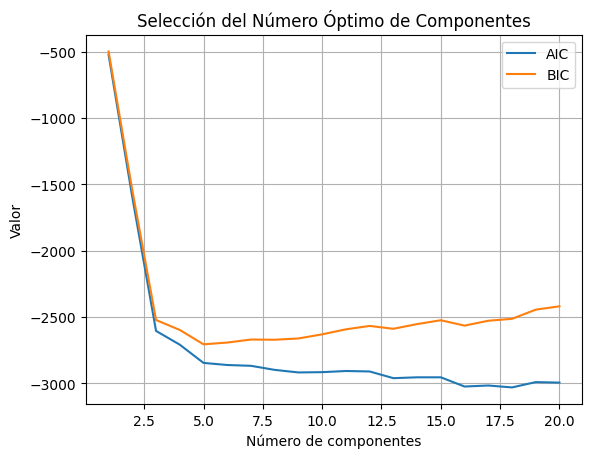

In [29]:
from sklearn.mixture import GaussianMixture

# Supongamos que 'data' es tu matriz de datos de NumPy
n_components = np.arange(1, 21)  # Cantidad de clusters a evaluar con los datos

# Generar los modelos
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data) for n in n_components]

# Obtener los valores AIC y BIC
aic = [m.aic(data) for m in models]
bic = [m.bic(data) for m in models]

# Graficar AIC y BIC
plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.legend()
plt.xlabel('Número de componentes')
plt.ylabel('Valor')
plt.title('Selección del Número Óptimo de Componentes')
plt.grid(True)
plt.show()


El AIC representa la diferencia relativa entre la función de probabilidad verdadera y la función de probabilidad ajustada del modelo, mientras que el BIC indica la probabilidad posterior de que un modelo sea verdadero dentro de un enfoque bayesiano específico. (Randa, 2019)

Tanto AIC como BIC son de ayuda para encontrar el balance óptimo entre la complejidad del modelo y su habilidad para ajustarse a los datos, lo cual es crucial para evitar elegir un modelo demasiado simple que no capture la estructura de los datos o uno demasiado complejo que ajuste el "ruido". Se utilizó AIC y BIC para seleccionar el número óptimo de clusters en un GMM, eligiendo el modelo que minimice estos criterios, por lo tanto una cantidad de cluster de 5 parece ser la óptima.

Referencias: 
- Randa, R. (2019). AIC/BIC in Model Selection. https://www.linkedin.com/pulse/aicbic-model-selection-richard-randa#:~:text=AIC%20is%20an%20estimate%20of,under%20a%20certain%20Bayesian%20setup.
- VanderPlas, J. (s.f.). In Depth: Gaussian Mixture Models. https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

**PCA**

El Análisis de Componentes Principales (PCA) ofrece diversas ventajas para mejorar el clustering. Por un lado, reduce la dimensionalidad de los datos al proyectarlos en un espacio de menor dimensión, lo que ayuda a resaltar los patrones de clustering al eliminar ruido y redundancia. Además, al enfocarse en las direcciones de mayor varianza, PCA mejora la separación entre clusters, facilitando su identificación. También posibilita la visualización de datos en 2D o 3D, proporcionando insights sobre la estructura y calidad de los clusters. Sin embargo, es crucial evaluar cuántas componentes principales mantener para preservar la información relevante y las características importantes para el análisis de clustering, ya que PCA puede llevar a la pérdida de información relevante.

Referencia: B., Whitfield. (2023). A Step-by-Step Explanation of Principal Component Analysis (PCA) https://builtin.com/data-science/step-step-explanation-principal-component-analysis

**Entrenamiento del modelo**

In [30]:
# Inicialización y ajuste del modelo GMM
gmm = GMM(k=5, max_iter=1000, tol=1e-5, random_state=42)
gmm.fit(data)

**Gráfico de los Clusters**

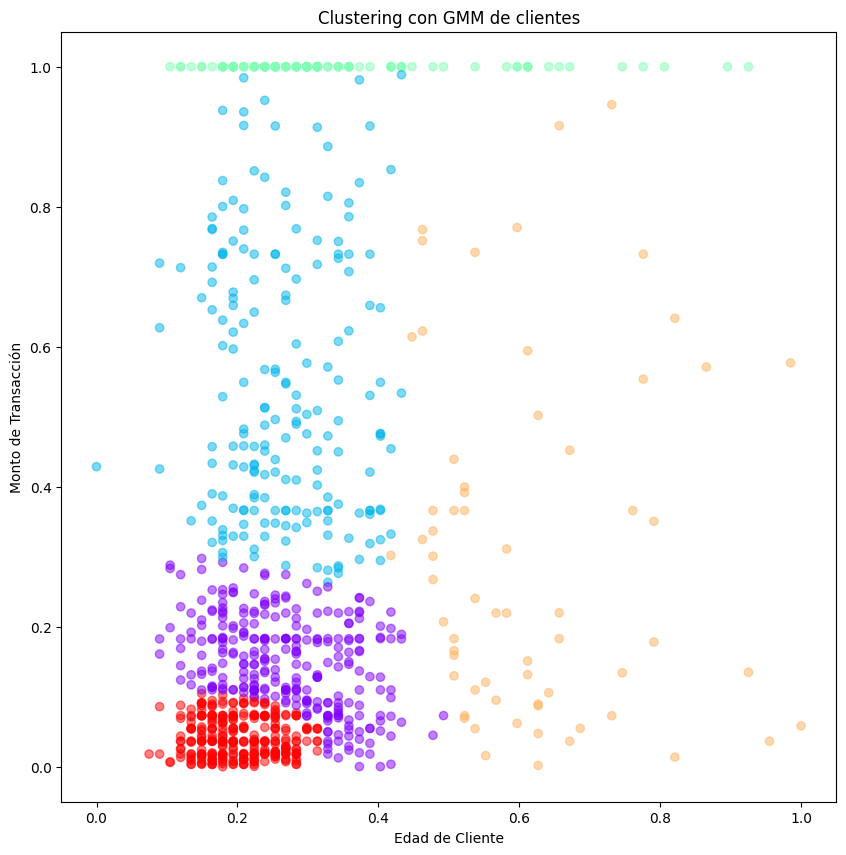

In [31]:
# Suponiendo que 'data_np' contiene tus dos características seleccionadas y 'gmm' es tu modelo ya ajustado
cluster_labels = gmm.predict(data)

# Generar colores para cada cluster de forma aleatoria o predefinida
colors = plt.cm.rainbow(np.linspace(0, 1, gmm.k))

# Añadir etiquetas de cluster al DataFrame para facilitar la visualización
features['cluster_labels'] = cluster_labels

# Añadir colores a cada punto basado en su etiqueta de cluster
features['color'] = features['cluster_labels'].apply(lambda x: colors[x])

# Graficar los puntos con colores de cluster
plt.figure(figsize=(10, 10))
plt.scatter(features['CustomerAge'], features['TransactionAmount (INR)'], c=features['color'], alpha=0.5)

plt.xlabel('Edad de Cliente')
plt.ylabel('Monto de Transacción')
plt.title('Clustering con GMM de clientes')
plt.show()


**Métrica de desempeño principal**

In [32]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture

# Ajustar el modelo GMM (esto es un ejemplo, ajusta los parámetros según sea necesario)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data)
cluster_labels = gmm.predict(data)

# Calcular Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Calinski-Harabasz Index: 1138.9426769888767


El Índice de Calinski-Harabasz (CH) es una métrica de desempeño para clustering que evalúa la calidad de los clusters en términos de su cohesión interna y separación mutua. Un valor más alto del CH indica clusters más definidos. En este caso, el valor arriba de 1000 sugiere que los clusters formados son densos y bien separados, lo que indica un buen rendimiento de clustering.

Referencia: 
- geeksforgeeks. (2022). Calinski-Harabasz Index – Cluster Validity indices | Set 3. https://www.geeksforgeeks.org/calinski-harabasz-index-cluster-validity-indices-set-3/